In [3]:
!pip install scikit-image

    100% |████████████████████████████████| 27.8MB 30kB/s eta 0:00:011
    100% |████████████████████████████████| 1.6MB 549kB/s ta 0:00:011
    100% |████████████████████████████████| 4.8MB 178kB/s ta 0:00:011
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /Users/davidwoo/Library/Caches/pip/wheels/27/82/23/785d5d01de2271edf929ac2761cb5dafc0dfa76a0861bfd128
Successfully built networkx
  Found existing installation: decorator 4.0.11
    Uninstalling decorator-4.0.11:
      Successfully uninstalled decorator-4.0.11


CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs


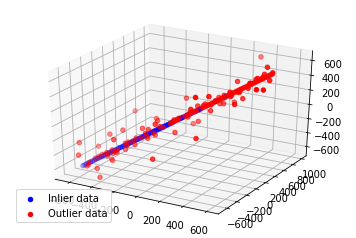

In [17]:
%time

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import LineModelND, ransac,EllipseModel
import matplotlib.animation as animation

np.random.seed(seed=1)

# generate coordinates of line
point = np.array([0, 0, 0], dtype='float')
direction = np.array([1, 1, 1], dtype='float') / np.sqrt(3)
xyz = point + 10 * np.arange(-100, 100)[..., np.newaxis] * direction

# add gaussian noise to coordinates
noise = np.random.normal(size=xyz.shape)
xyz += 0.5 * noise
xyz[::2] += 20 * noise[::2]
xyz[::4] += 100 * noise[::4]

# robustly fit line only using inlier data with RANSAC algorithm
#model_robust, inliers = ransac(xyz, EllipseModel, min_samples=2,
#                               residual_threshold=1, max_trials=1000)

model_robust, inliers = ransac(xyz, LineModelND, min_samples=20,
                               residual_threshold=3, max_trials=1000)
outliers = inliers == False

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xyz[inliers][:, 0], xyz[inliers][:, 1], xyz[inliers][:, 2], c='b',
           marker='o', label='Inlier data')
ax.scatter(xyz[outliers][:, 0], xyz[outliers][:, 1], xyz[outliers][:, 2], c='r',
           marker='o', label='Outlier data')
ax.legend(loc='lower left')
plt.show()

In [13]:
# how to show rotating 3d plot https://stackoverflow.com/a/37731264/3302757

%pylab inline
from IPython.display import HTML
from matplotlib import rc, animation
rc('animation', html='html5')
# how to rotate image

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

def rotate(angle):
    ax.view_init(azim=angle)
    
def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))
    
rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

rot_animation

Populating the interactive namespace from numpy and matplotlib
